Point 1: [0 0 0] red
Point 2: [ 0. 10.  0.] blue
Point 3: [ 0.  0. 10.] green


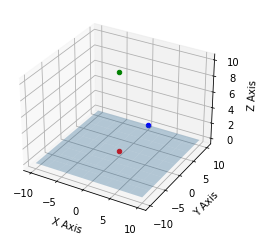

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def find_fault_plane_points(strike, dip, fault_point):
    # Преобразование углов в радианы
    strike_rad = np.radians(strike)
    dip_rad = np.radians(dip)

    # Вектор нормали к плоскости разлома
    normal_vector = [
        np.sin(strike_rad) * np.sin(dip_rad),
        -np.cos(strike_rad) * np.sin(dip_rad),
        np.cos(dip_rad)
    ]

    # Вычисление двух дополнительных точек на плоскости разлома
    point2 = np.array(fault_point) + np.array([np.sin(strike_rad), np.cos(strike_rad), 0])
    point3 = np.array(fault_point) + np.array(normal_vector)

    return np.array(fault_point), point2, point3



# Функция для построения плоскости разлома
def plot_fault_plane(strike, dip, point, size=10):
    # Преобразование углов в радианы
    strike_rad = np.radians(strike)
    dip_rad = np.radians(dip)

    # Нахождение направления вектора нормали к плоскости
    normal_vector = [
        np.sin(strike_rad) * np.sin(dip_rad),
        -np.cos(strike_rad) * np.sin(dip_rad),
        np.cos(dip_rad)
    ]

    # Создание сетки для плоскости
    xx, yy = np.meshgrid(np.linspace(-size, size, 10), np.linspace(-size, size, 10))
    zz = (-normal_vector[0] * xx - normal_vector[1] * yy + np.dot(normal_vector, point)) / normal_vector[2]

    # Визуализация
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, zz, alpha=0.3)

    p1, p2, p3 = find_fault_plane_points(strike, dip, point)

    p1 *= 10
    p2 *= 10
    p3 *= 10
    print("Point 1:", p1, 'red')
    print("Point 2:", p2, 'blue')
    print("Point 3:", p3, 'green')

    # Метка точки разлома
    ax.scatter(*point, color='red')
    ax.scatter(*p2, color='blue')
    ax.scatter(*p3, color='green')

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    plt.show()

# Пример использования
point_of_fault = [0, 0, 0]  # Пример точки разлома
dip_angle = 0              # Угол падения в градусах
strike_angle = 0          # Направление в градусах

plot_fault_plane(strike_angle, dip_angle, point_of_fault)
